In [23]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [24]:
dataset = read_csv("heart.csv")

In [25]:
print(dataset.shape)

(1025, 14)


In [26]:
print(dataset.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   
5   58    0   0       100   248    0        0      122      0      1.0      1   
6   58    1   0       114   318    0        2      140      0      4.4      0   
7   55    1   0       160   289    0        0      145      1      0.8      1   
8   46    1   0       120   249    0        0      144      0      0.8      2   
9   54    1   0       122   286    0        0      116      1      3.2      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0 

In [27]:
print(dataset[["age","trestbps","chol","fbs"]].describe())

               age     trestbps        chol          fbs
count  1025.000000  1025.000000  1025.00000  1025.000000
mean     54.434146   131.611707   246.00000     0.149268
std       9.072290    17.516718    51.59251     0.356527
min      29.000000    94.000000   126.00000     0.000000
25%      48.000000   120.000000   211.00000     0.000000
50%      56.000000   130.000000   240.00000     0.000000
75%      61.000000   140.000000   275.00000     0.000000
max      77.000000   200.000000   564.00000     1.000000


In [28]:
print(dataset.groupby('target').size())

target
0    499
1    526
dtype: int64


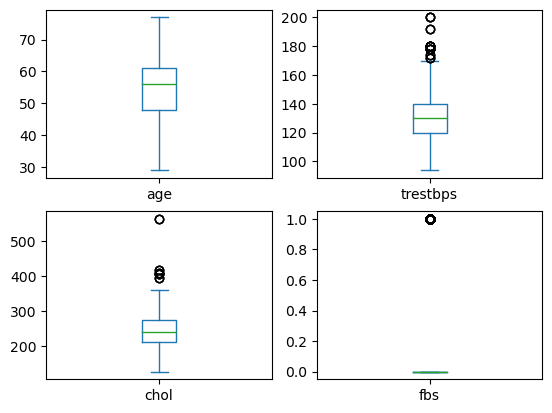

In [29]:
dataset[["age","trestbps","chol","fbs"]].plot(kind='box',subplots=True, \
layout=(2,2),sharex=False,sharey=False)
pyplot.show()

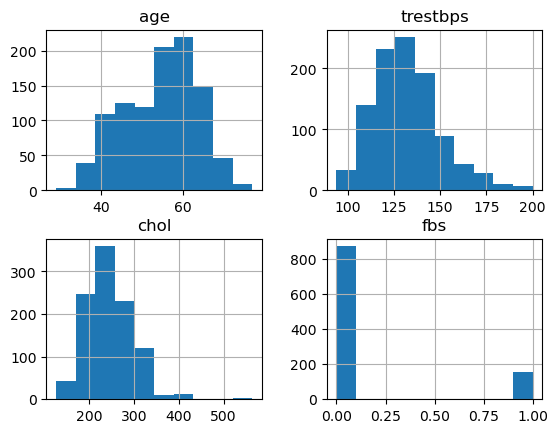

In [30]:
dataset[["age","trestbps","chol","fbs"]].hist()
pyplot.show()

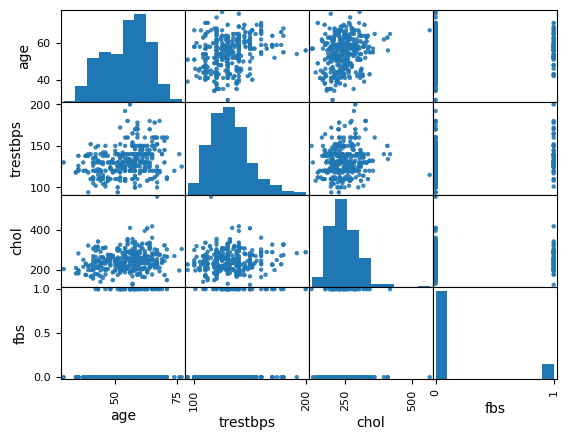

In [31]:
scatter_matrix(dataset[["age","trestbps","chol","fbs"]])
pyplot.show()

In [32]:
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [33]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.835544 (0.047796)
LDA: 0.832707 (0.047211)
KNN: 0.729480 (0.041518)
CART: 0.987441 (0.009787)
NB: 0.836894 (0.049667)
SVM: 0.972183 (0.023241)


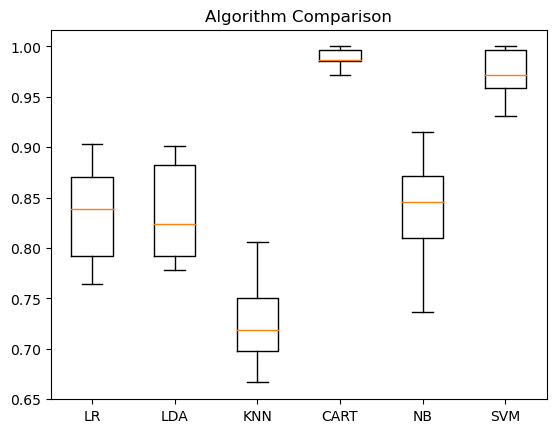

In [34]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [35]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [36]:
print (accuracy_score(Y_validation, predictions))
print (confusion_matrix(Y_validation, predictions))
print (classification_report(Y_validation, predictions))

0.9902597402597403
[[161   0]
 [  3 144]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       161
         1.0       1.00      0.98      0.99       147

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

